In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
iris=datasets.load_iris()
u=iris.target
v=iris.data
print(u)
print(v)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

In [21]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [22]:
vtrain,vtest,utrain,utest=train_test_split(v,u,test_size=.25,random_state=25)
print(vtrain,"\n")
print(vtest,"\n")
print(utrain,"\n")
print(utest)



[[5.1 3.3 1.7 0.5]
 [5.  3.2 1.2 0.2]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.2]
 [4.4 2.9 1.4 0.2]
 [5.  3.  1.6 0.2]
 [6.  3.  4.8 1.8]
 [5.4 3.7 1.5 0.2]
 [5.5 4.2 1.4 0.2]
 [6.  2.9 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.6 2.8 4.9 2. ]
 [7.1 3.  5.9 2.1]
 [5.  3.4 1.5 0.2]
 [4.8 3.  1.4 0.1]
 [6.3 2.9 5.6 1.8]
 [5.8 2.7 3.9 1.2]
 [5.8 2.8 5.1 2.4]
 [6.7 3.  5.2 2.3]
 [5.7 2.8 4.5 1.3]
 [6.7 3.3 5.7 2.1]
 [5.7 3.  4.2 1.2]
 [6.2 2.8 4.8 1.8]
 [6.7 2.5 5.8 1.8]
 [5.5 2.4 3.8 1.1]
 [5.1 3.8 1.5 0.3]
 [6.  2.2 5.  1.5]
 [6.3 3.3 4.7 1.6]
 [6.5 3.2 5.1 2. ]
 [5.2 4.1 1.5 0.1]
 [5.2 2.7 3.9 1.4]
 [6.7 3.  5.  1.7]
 [4.9 3.1 1.5 0.1]
 [4.8 3.4 1.9 0.2]
 [6.7 3.3 5.7 2.5]
 [6.1 2.9 4.7 1.4]
 [6.6 3.  4.4 1.4]
 [5.1 3.8 1.9 0.4]
 [7.6 3.  6.6 2.1]
 [5.8 2.7 4.1 1. ]
 [5.8 2.7 5.1 1.9]
 [5.7 2.9 4.2 1.3]
 [6.5 3.  5.5 1.8]
 [4.3 3.  1.1 0.1]
 [4.7 3.2 1.6 0.2]
 [5.5 2.3 4.  1.3]
 [5.1 3.8 1.6 0.2]
 [5.1 3.4 1.5 0.2]
 [6.8 2.8 4.8 1.4]
 [6.3 2.7 4.9 1.8]
 [5.7 4.4 1.5 0.4]
 [6.2 3.4 5.4 2.3]
 [6.1 2.8 4.

In [26]:
NB=GaussianNB()
NB.fit(vtrain,utrain)
u_predict=NB.predict(vtest)
print("---Test class--\n",utest)
print("\n---predict class---\n",u_predict)


---Test class--
 [0 1 1 1 2 1 2 0 1 1 0 0 0 2 0 1 2 2 1 1 1 1 1 0 0 2 1 2 2 0 1 2 2 0 2 1 1
 0]

---predict class---
 [0 1 2 1 2 1 2 0 1 1 0 0 0 1 0 1 2 2 1 1 1 1 1 0 0 2 1 2 2 0 1 2 2 0 2 2 1
 0]


[[11  0  0]
 [ 0 14  2]
 [ 0  1 10]]


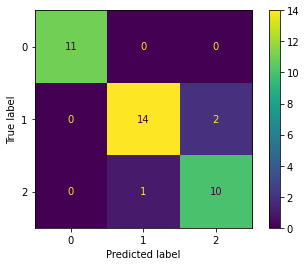

In [29]:
cm=confusion_matrix(utest,u_predict,normalize=None)
print(cm)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,)
cm_dis.plot()
plt.show()